In [165]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [166]:
conn = sqlite3.connect('FPA_FOD_20170508.sqlite')

In [167]:
fire_df = pd.read_sql("""
SELECT * 
FROM fires
Where State = 'CA'


""",con = conn)

In [168]:
df =fire_df[['FIRE_YEAR',  'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE','LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY','FIPS_CODE', 'FIPS_NAME', 'Shape']] 

In [169]:
dfbare = fire_df[['FIRE_YEAR',  'FIRE_SIZE', 'FIRE_SIZE_CLASS']]
dfbare

,FIRE_YEAR,FIRE_SIZE,FIRE_SIZE_CLASS
0,2005,0.10,A
1,2004,0.25,A
2,2004,0.10,A
3,2004,0.10,A
4,2004,0.10,A
5,2004,0.10,A
6,2004,0.10,A
7,2005,0.80,B
8,2005,1.00,B
9,2004,0.10,A


In [171]:
# xls = pd.ExcelFile('2016to2018WF.xlsx')
df1 = pd.read_csv('2016.csv')
df2 = pd.read_csv('2017.csv')
df3 = pd.read_csv('2018.csv')
df1["FIRE_SIZE"] = pd.to_numeric(df1["FIRE_SIZE"])
df2["FIRE_SIZE"] = pd.to_numeric(df2["FIRE_SIZE"])
df3["FIRE_SIZE"] = pd.to_numeric(df3["FIRE_SIZE"])

df1=df1[['FIRE_YEAR',  'FIRE_SIZE', 'FIRE_SIZE_CLASS']]
df2=df2[['FIRE_YEAR',  'FIRE_SIZE', 'FIRE_SIZE_CLASS']]
df3=df3[['FIRE_YEAR',  'FIRE_SIZE', 'FIRE_SIZE_CLASS']]

In [172]:
frames = [df1,df2,df3]
dfnew = pd.concat(frames,sort = True)
# dfnew.reset_index()
# dfbare
frames2 = [dfbare,dfnew] 
dfnew2 = pd.concat(frames2,sort = True)

# # dfnew.reset_index()
dfnew2


,FIRE_SIZE,FIRE_SIZE_CLASS,FIRE_YEAR
0,0.10,A,2005
1,0.25,A,2004
2,0.10,A,2004
3,0.10,A,2004
4,0.10,A,2004
5,0.10,A,2004
6,0.10,A,2004
7,0.80,B,2005
8,1.00,B,2005
9,0.10,A,2004


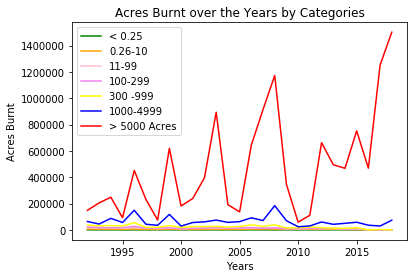

In [177]:
# Data to plot Graph of Acres Burnt per Class of Fire 
df_year= dfnew2.groupby(["FIRE_YEAR","FIRE_SIZE_CLASS"])["FIRE_SIZE"].sum()
df_year = df_year.to_frame()
df_year = df_year.reset_index()
df_yearA = df_year[(df_year["FIRE_SIZE_CLASS"] == "A")]
df_yearB = df_year[(df_year["FIRE_SIZE_CLASS"] == "B")]
df_yearC = df_year[(df_year["FIRE_SIZE_CLASS"] == "C")]
df_yearD = df_year[(df_year["FIRE_SIZE_CLASS"] == "D")]
df_yearE = df_year[(df_year["FIRE_SIZE_CLASS"] == "E")]
df_yearF = df_year[(df_year["FIRE_SIZE_CLASS"] == "F")]
df_yearG = df_year[(df_year["FIRE_SIZE_CLASS"] == "G")]
plt.plot(df_yearA["FIRE_YEAR"],df_yearA["FIRE_SIZE"],color = "Green",label = "< 0.25")
plt.plot(df_yearB["FIRE_YEAR"],df_yearB["FIRE_SIZE"],color= "Orange", label = "0.26-10")
plt.plot(df_yearC["FIRE_YEAR"],df_yearC["FIRE_SIZE"],color= "Pink", label= "11-99")
plt.plot(df_yearD["FIRE_YEAR"],df_yearD["FIRE_SIZE"],color ="Violet",label= "100-299")
plt.plot(df_yearE["FIRE_YEAR"],df_yearE["FIRE_SIZE"],color = 'Yellow', label = "300 -999")
plt.plot(df_yearF["FIRE_YEAR"],df_yearF["FIRE_SIZE"],color = 'Blue', label = "1000-4999")
plt.plot(df_yearG["FIRE_YEAR"],df_yearG["FIRE_SIZE"],color='Red', label="> 5000 Acres")
plt.title("Acres Burnt over the Years by Categories")
plt.xlabel("Years")
plt.ylabel("Acres Burnt")
plt.legend(loc="upper left")
plt.show()



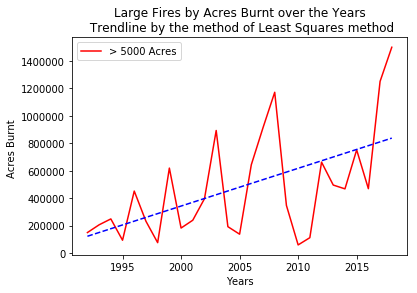

'y=27542.11 x + -54742074.34'

In [162]:
# df_g= dfnew2[(dfnew2["FIRE_SIZE_CLASS"] == "G")]
plt.plot(df_yearG["FIRE_YEAR"],df_yearG["FIRE_SIZE"],color='Red', label="> 5000 Acres")
y = df_yearG["FIRE_SIZE"]
x =df_yearG["FIRE_YEAR"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")
plt.title("Large Fires by Acres Burnt over the Years\n Trendline ")
plt.xlabel("Years")
plt.ylabel("Acres Burnt ")
plt.legend(loc="upper left")
plt.show()
'y={0:.2f} x + {1:.2f}'.format(z[0],z[1])

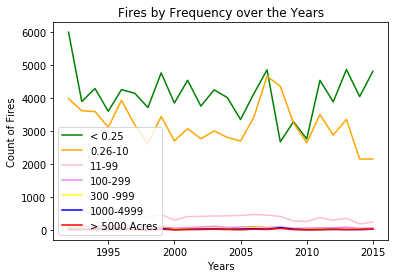

In [174]:
df_year= df.groupby(["FIRE_YEAR","FIRE_SIZE_CLASS"])
df_year = df_year.count().reset_index()
df_yearA = df_year[(df_year["FIRE_SIZE_CLASS"] == "A")]
df_yearB = df_year[(df_year["FIRE_SIZE_CLASS"] == "B")]
df_yearC = df_year[(df_year["FIRE_SIZE_CLASS"] == "C")]
df_yearD = df_year[(df_year["FIRE_SIZE_CLASS"] == "D")]
df_yearE = df_year[(df_year["FIRE_SIZE_CLASS"] == "E")]
df_yearF = df_year[(df_year["FIRE_SIZE_CLASS"] == "F")]
df_yearG = df_year[(df_year["FIRE_SIZE_CLASS"] == "G")]
plt.plot(df_yearA["FIRE_YEAR"],df_yearA["FIRE_SIZE"],color = "Green",label = "< 0.25")
plt.plot(df_yearB["FIRE_YEAR"],df_yearB["FIRE_SIZE"],color= "Orange", label = "0.26-10")
plt.plot(df_yearC["FIRE_YEAR"],df_yearC["FIRE_SIZE"],color= "Pink", label= "11-99")
plt.plot(df_yearD["FIRE_YEAR"],df_yearD["FIRE_SIZE"],color ="Violet",label= "100-299")
plt.plot(df_yearE["FIRE_YEAR"],df_yearE["FIRE_SIZE"],color = 'Yellow', label = "300 -999")
plt.plot(df_yearF["FIRE_YEAR"],df_yearF["FIRE_SIZE"],color = 'Blue', label = "1000-4999")
plt.plot(df_yearG["FIRE_YEAR"],df_yearG["FIRE_SIZE"],color='Red', label="> 5000 Acres")
plt.title("Fires by Frequency over the Years")
plt.xlabel("Years")
plt.ylabel("Count of Fires")
plt.legend(loc="lower left")
plt.show()



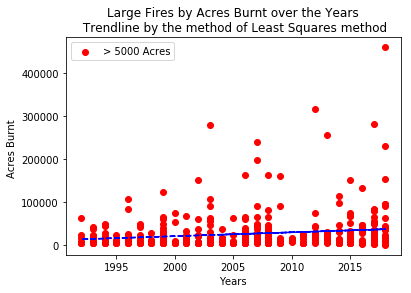

'y=896.00 x + -1770496.21'

In [175]:
df_g= dfnew2[(dfnew2["FIRE_SIZE_CLASS"] == "G")]
plt.scatter(df_g["FIRE_YEAR"],df_g["FIRE_SIZE"],color='Red', label="> 5000 Acres")
y = df_g["FIRE_SIZE"]
x =df_g["FIRE_YEAR"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")
plt.title("Large Fires by Acres Burnt over the Years\n Trendline by the method of Least Squares method")
plt.xlabel("Years")
plt.ylabel("Acres Burnt ")
plt.legend(loc="upper left")
plt.show()
'y={0:.2f} x + {1:.2f}'.format(z[0],z[1])

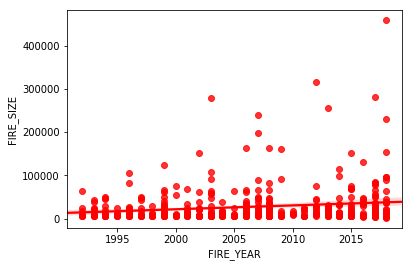

In [176]:
sns.regplot(df_g["FIRE_YEAR"],df_g["FIRE_SIZE"],color='Red', label="> 5000 Acres")